In [1]:
%pip install seaborn matplotlib pandas sentence-transformers scikit-learn


In [ ]:

import sqlite3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
# Get current directory
current_dir = os.getcwd()


# Get the PARENT directory (go up one level)
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)

# verify where we are looking (Optional, for debugging)
print(f"Current Dir: {current_dir}")
print(f"Parent Dir added: {parent_dir}")
from utils.database import load_db

DB_PATH = "enron.db"

SAVE_DIR = "plots/"
SAVE_DIR_TBLS = 'tbls/'

experiment = False

get_employees = True

# conn = sqlite3.connect(DB_PATH)
# c = conn.cursor()

# if experiment:
#     sql_query = "SELECT * FROM Message" 
# else:
#     sql_query = "SELECT * FROM v_DroppedFolders" 
if experiment:
    sql_query = "SELECT * FROM v_ExpMessages" 
else:
    sql_query = "v_CleanMessages_thread" 
    df_no_folders = load_db("v_DroppedFolders")
    
if get_employees:
    sql_query_employees = "Employeelist"
    df_employeelist = load_db(sql_query_employees)

# 2. Use pd.read_sql_query to execute and fetch data
df = load_db(sql_query)

# conn.commit()
# conn.close()

In [22]:
if not experiment:
    print('yes')
    # 2. Define file path
    filepath = os.path.join(SAVE_DIR_TBLS, f"general_stats.tex")

    total = df.shape[0]
    total_folders = df_no_folders.shape[0]

    # 3. Write LaTeX commands to the file
    # We use :.0f for integers (like min/max) and :.2f for floats (like mean)
    # The 'r' before the string (rf"...") handles backslashes
    with open(filepath, 'w') as f:
        print(f"Writing stats for 'general stats' to {filepath}...")
        # Using \newcommand instead of \def is safer as it checks for existence
        # We add a comma to the formatted integer values
        f.write(rf"\newcommand{{\NoFolderLength}}{{{total_folders:,.0f}}}" + "\n")
        f.write(rf"\newcommand{{\GeneralLength}}{{{total:,.0f}}}" + "\n")


yes
Writing stats for 'general stats' to tbls/general_stats.tex...


In [ ]:
large_words_df = df[df['clean_length_word'] > 10_000].sort_values(by=['clean_length_word'], ascending=False)
large_words_df

,mid,sender,eid,date,message_id,subject,body,folder,length_character,length_word
6839,44328,sarah.palmer@enron.com,44063,18/01/2002,<28543449.1075841171541.JavaMail.evans@thyme>,Enron Mentions -- 01/18/02,Enron Letter Writer Worked At Key Partnership ...,inbox,382300,60526
6809,44131,sarah.palmer@enron.com,44063,22/01/2002,<3540098.1075841167699.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 01/22/02...,Staff Saw Document Shredding at Enron --- Thre...,inbox,296101,47493
6808,44177,sarah.palmer@enron.com,44063,16/01/2002,<8593617.1075841176356.JavaMail.evans@thyme>,Enron Mentions (Part I) -- 01/16/02,Publicized Letter to Lay Involved Struggle Ove...,inbox,275335,44088
6824,44500,karen.denne@enron.com,44063,11/01/2002,<18448215.1075841182041.JavaMail.evans@thyme>,Enron Mentions - 1/11,News; Domestic\nInterview with General Tommy F...,inbox,280338,43087
6842,44245,sarah.palmer@enron.com,44063,22/01/2002,<20129879.1075841164549.JavaMail.evans@thyme>,Enron Mentions -- 01/22/02-01/21/02,Enron Attorney Says FBI Is Probing Shredding a...,inbox,245570,39163
6811,44116,sarah.palmer@enron.com,44063,04/02/2002,<15600486.1075841151666.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 02/04/2002,ENRON'S MANY STRANDS\nThe Report\nThe New York...,inbox,212063,33592
6847,44439,sarah.palmer@enron.com,44063,01/02/2002,<6336501.1075841154311.JavaMail.evans@thyme>,Enron Mentions -- 02/01/02,Joint Venture: A 1997 Enron Meeting Belies Off...,inbox,189151,30232
6810,44306,sarah.palmer@enron.com,44063,23/01/2002,<19071614.1075841162137.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 01/23/02...,Lawyers agree on order to safeguard documents\...,inbox,174126,27916
2486,11036,karen.denne@enron.com,10807,23/11/2001,<14699860.1075861375899.JavaMail.evans@thyme>,Articles,A full list of articles will be sent on Monday...,inbox,169748,26478
6813,44163,sarah.palmer@enron.com,44063,06/02/2002,<2943840.1075841146795.JavaMail.evans@thyme>,Enron Mentions (major papers only) -- 02/06/02,Questioning the Books: Enron Official Failed t...,inbox,161899,25769


# KDE word character Plot

In [ ]:
words_counts = df['clean_length_word'].to_numpy()
character_counts = df['clean_length_character'].to_numpy()


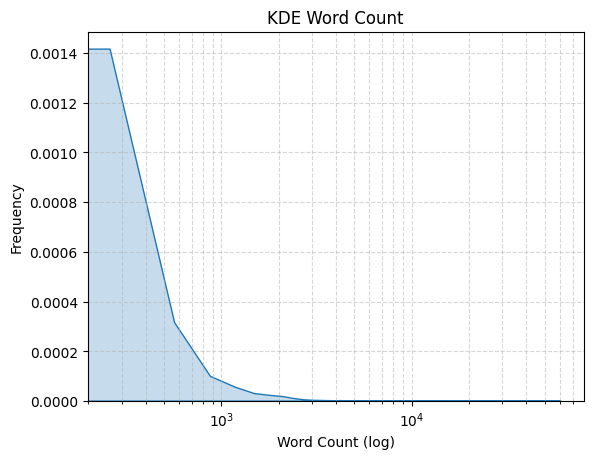

In [116]:

# sns.kdeplot(words_counts, fill=True)
# plt.title('KDE Word Count')
# plt.xscale('log')
# plt.xlabel('Word Count (log)')
# plt.ylabel('Frequency')
# plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig(SAVE_DIR + 'word_count_kde.png')
# plt.show()
# plt.close()

# sns.kdeplot(words_counts, fill=True)
# plt.title('KDE Word Count')
# plt.xscale('log')
# plt.xlabel('Word Count (log)')
# plt.ylabel('Frequency')
# plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig(SAVE_DIR + 'word_count_kde.png')
# plt.show()
# plt.close()

# 1. Create a larger figure so elements aren't cramped
plt.figure(figsize=(10, 6)) 

# Your original plot
sns.kdeplot(words_counts, fill=True)

# 2. Increase Title Size
plt.title('KDE Word Count', fontsize=18)

# 3. Increase Axis Label Size & Add Padding to prevent overlap
plt.xlabel('Word Count (log)', fontsize=14)
plt.ylabel('Frequency', fontsize=14, labelpad=15) # labelpad pushes the text away from numbers

# 4. Increase the numbers (tick labels) on both axes
plt.tick_params(axis='both', which='major', labelsize=12)

# Keep your original settings
plt.xscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)

# 5. Automatically adjust margins so nothing gets cut off
plt.tight_layout()

plt.savefig(SAVE_DIR + 'word_count_kde.png')
plt.show()
plt.close()

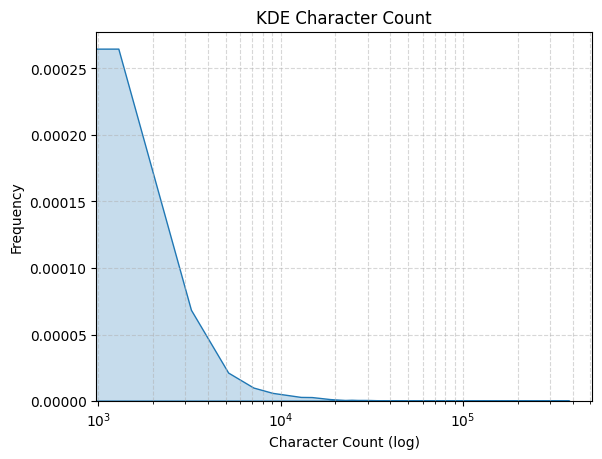

In [117]:

# sns.kdeplot(character_counts, fill=True)
# plt.title('KDE Character Count')
# plt.xscale('log')
# plt.xlabel('Character Count (log)')
# plt.ylabel('Frequency')
# plt.grid(True, which="both", ls="--", alpha=0.5)
# plt.savefig(SAVE_DIR + 'character_count_kde.png')
# plt.show()
# plt.close()

# 1. Create a larger figure
plt.figure(figsize=(10, 6))

# Your original plot
sns.kdeplot(character_counts, fill=True)

# 2. Increase Title Size
plt.title('KDE Character Count', fontsize=18)

# 3. Increase Axis Label Size & Add Padding
plt.xlabel('Character Count (log)', fontsize=14)
plt.ylabel('Frequency', fontsize=14, labelpad=15) # labelpad fixes the overlap

# 4. Increase the numbers (tick labels)
plt.tick_params(axis='both', which='major', labelsize=12)

# Keep your original settings
plt.xscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)

# 5. Automatically adjust margins
plt.tight_layout()

plt.savefig(SAVE_DIR + 'character_count_kde.png')
plt.show()
plt.close()

# Box word character plot

In [ ]:
def export_stats_to_latex(name: str, data: np.array):
    """Calculates statistics and saves them as LaTeX macros in a .tex file."""
    
    # 1. Calculate Statistics
    total = np.sum(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    min_val = np.min(data)
    max_val = np.max(data)
    mean_val = np.mean(data)
    std_val = np.std(data)
    count_val = len(data)
    
    
    # Skewness: 3rd Moment / sigma^3
    skewness = np.mean(((data - mean_val) / std_val) ** 3)

    # Kurtosis (Fisher): 4th Moment / sigma^4 - 3
    kurtosis = np.mean(((data - mean_val) / std_val) ** 4) - 3


    # 2. Define file path
    filepath = os.path.join(SAVE_DIR_TBLS, f"{name}_stats.tex")

    # 3. Write LaTeX commands to the file
    # We use :.0f for integers (like min/max) and :.2f for floats (like mean)
    # The 'r' before the string (rf"...") handles backslashes
    try:
        with open(filepath, 'w') as f:
            print(f"Writing stats for '{name}' to {filepath}...")
            
            # Helper: Use 2 decimal places if small, otherwise integer
            def fmt(val):
                return f"{val:,.2f}" if abs(val) < 1 else f"{val:,.0f}"

            f.write(rf"\newcommand{{\{name}Length}}{{{total:,.0f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Min}}{{{fmt(min_val)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Qone}}{{{fmt(q1)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Median}}{{{fmt(median)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Qthree}}{{{fmt(q3)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Max}}{{{fmt(max_val)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Iqr}}{{{fmt(iqr)}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Count}}{{{count_val:,.0f}}}" + "\n")
            
            # Mean and Std usually require precision regardless of magnitude
            f.write(rf"\newcommand{{\{name}Mean}}{{{mean_val:,.2f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Std}}{{{std_val:,.2f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Skewness}}{{{skewness:,.2f}}}" + "\n")
            f.write(rf"\newcommand{{\{name}Kurtosis}}{{{kurtosis:,.2f}}}" + "\n")
            
        print(f"Successfully wrote {filepath}")
    except IOError as e:
        print(f"Error writing to file {filepath}: {e}")

In [32]:
def boxplot(name: str, data: np.array):
    export_stats_to_latex(name, data)

    # --- 1. Calculate Statistics ---
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    min_val = np.min(data)
    max_val = np.max(data)

    # --- 2. Print Statistics to Console ---
    print(f"\n--- Statistics for '{name}' ---")
    print(f"  Median: {median:,.0f}")
    print(f"  Q1 (25%): {q1:,.0f}")
    print(f"  Q3 (75%): {q3:,.0f}")
    print(f"  IQR: {iqr:,.0f}")
    print(f"  Min: {min_val:,.0f}")
    print(f"  Max: {max_val:,.0f}")
    print("-" * (20 + len(name)))

    sns.boxplot(x=data)
    plt.title(f'Box Plot of {name} count')
    plt.xscale('log')
    plt.xlabel(f'{name}s log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.savefig(f'{SAVE_DIR}{name}_counts_boxplot.png')
    plt.show()
    plt.close()


boxplot('character', character_counts)

boxplot('word', words_counts)



NameError: name 'character_counts' is not defined

# Calc and plot semantic similarity subject body

# Barplot size of folder names (autogenerated sperate from rest and maybe top 10)

In [11]:
df['folder'].nunique()

1325

In [23]:
# folder_size_df = df[['folder', 'length_word']]
# folder_size_df.sort_values(by="length_word", ascending=False, inplace=True)

folder_size_df = df.groupby('folder')['length_word'].sum().reset_index()
folder_size_df.sort_values(by="length_word", ascending=False, inplace=True)

In [13]:
merged_df = pd.merge(
    df,
    df_employeelist,
    on='eid',
    how='left'
)

In [21]:
print(df.columns)
print(df.shape)

Index(['mid', 'sender', 'eid', 'date', 'message_id', 'subject', 'body',
       'folder', 'length_character', 'length_word'],
      dtype='object')
(33864, 10)


In [20]:
print(df_employeelist.columns)

Index(['eid', 'user_name', 'firstName', 'lastName', 'status'], dtype='object')


In [22]:
print(merged_df.columns)
print(merged_df.shape)

Index(['mid', 'sender', 'eid', 'date', 'message_id', 'subject', 'body',
       'folder', 'length_character', 'length_word', 'user_name', 'firstName',
       'lastName', 'status'],
      dtype='object')
(33864, 14)


In [ ]:
merged_df_by_user_size = merged_df.groupby(['user_name'])['clean_length_word'].sum().reset_index()

In [16]:
merged_df[['user_name', 'folder']].drop_duplicates().shape[0]

1352

In [17]:
merged_df.groupby(['user_name', 'folder']).ngroups

74

In [15]:
merged_df[['user_name', 'folder']].nunique()

user_name      72
folder       1325
dtype: int64

In [ ]:
merged_df.groupby(['user_name'])

user_name
donoho-l       501
harris-s        53
holst-k        118
meyers-a         3
motley-m       153
phanis-s         6
reitmeyer-j    169
salisbury-h    690
slinger-r       32
whitt-m        350
dtype: int64

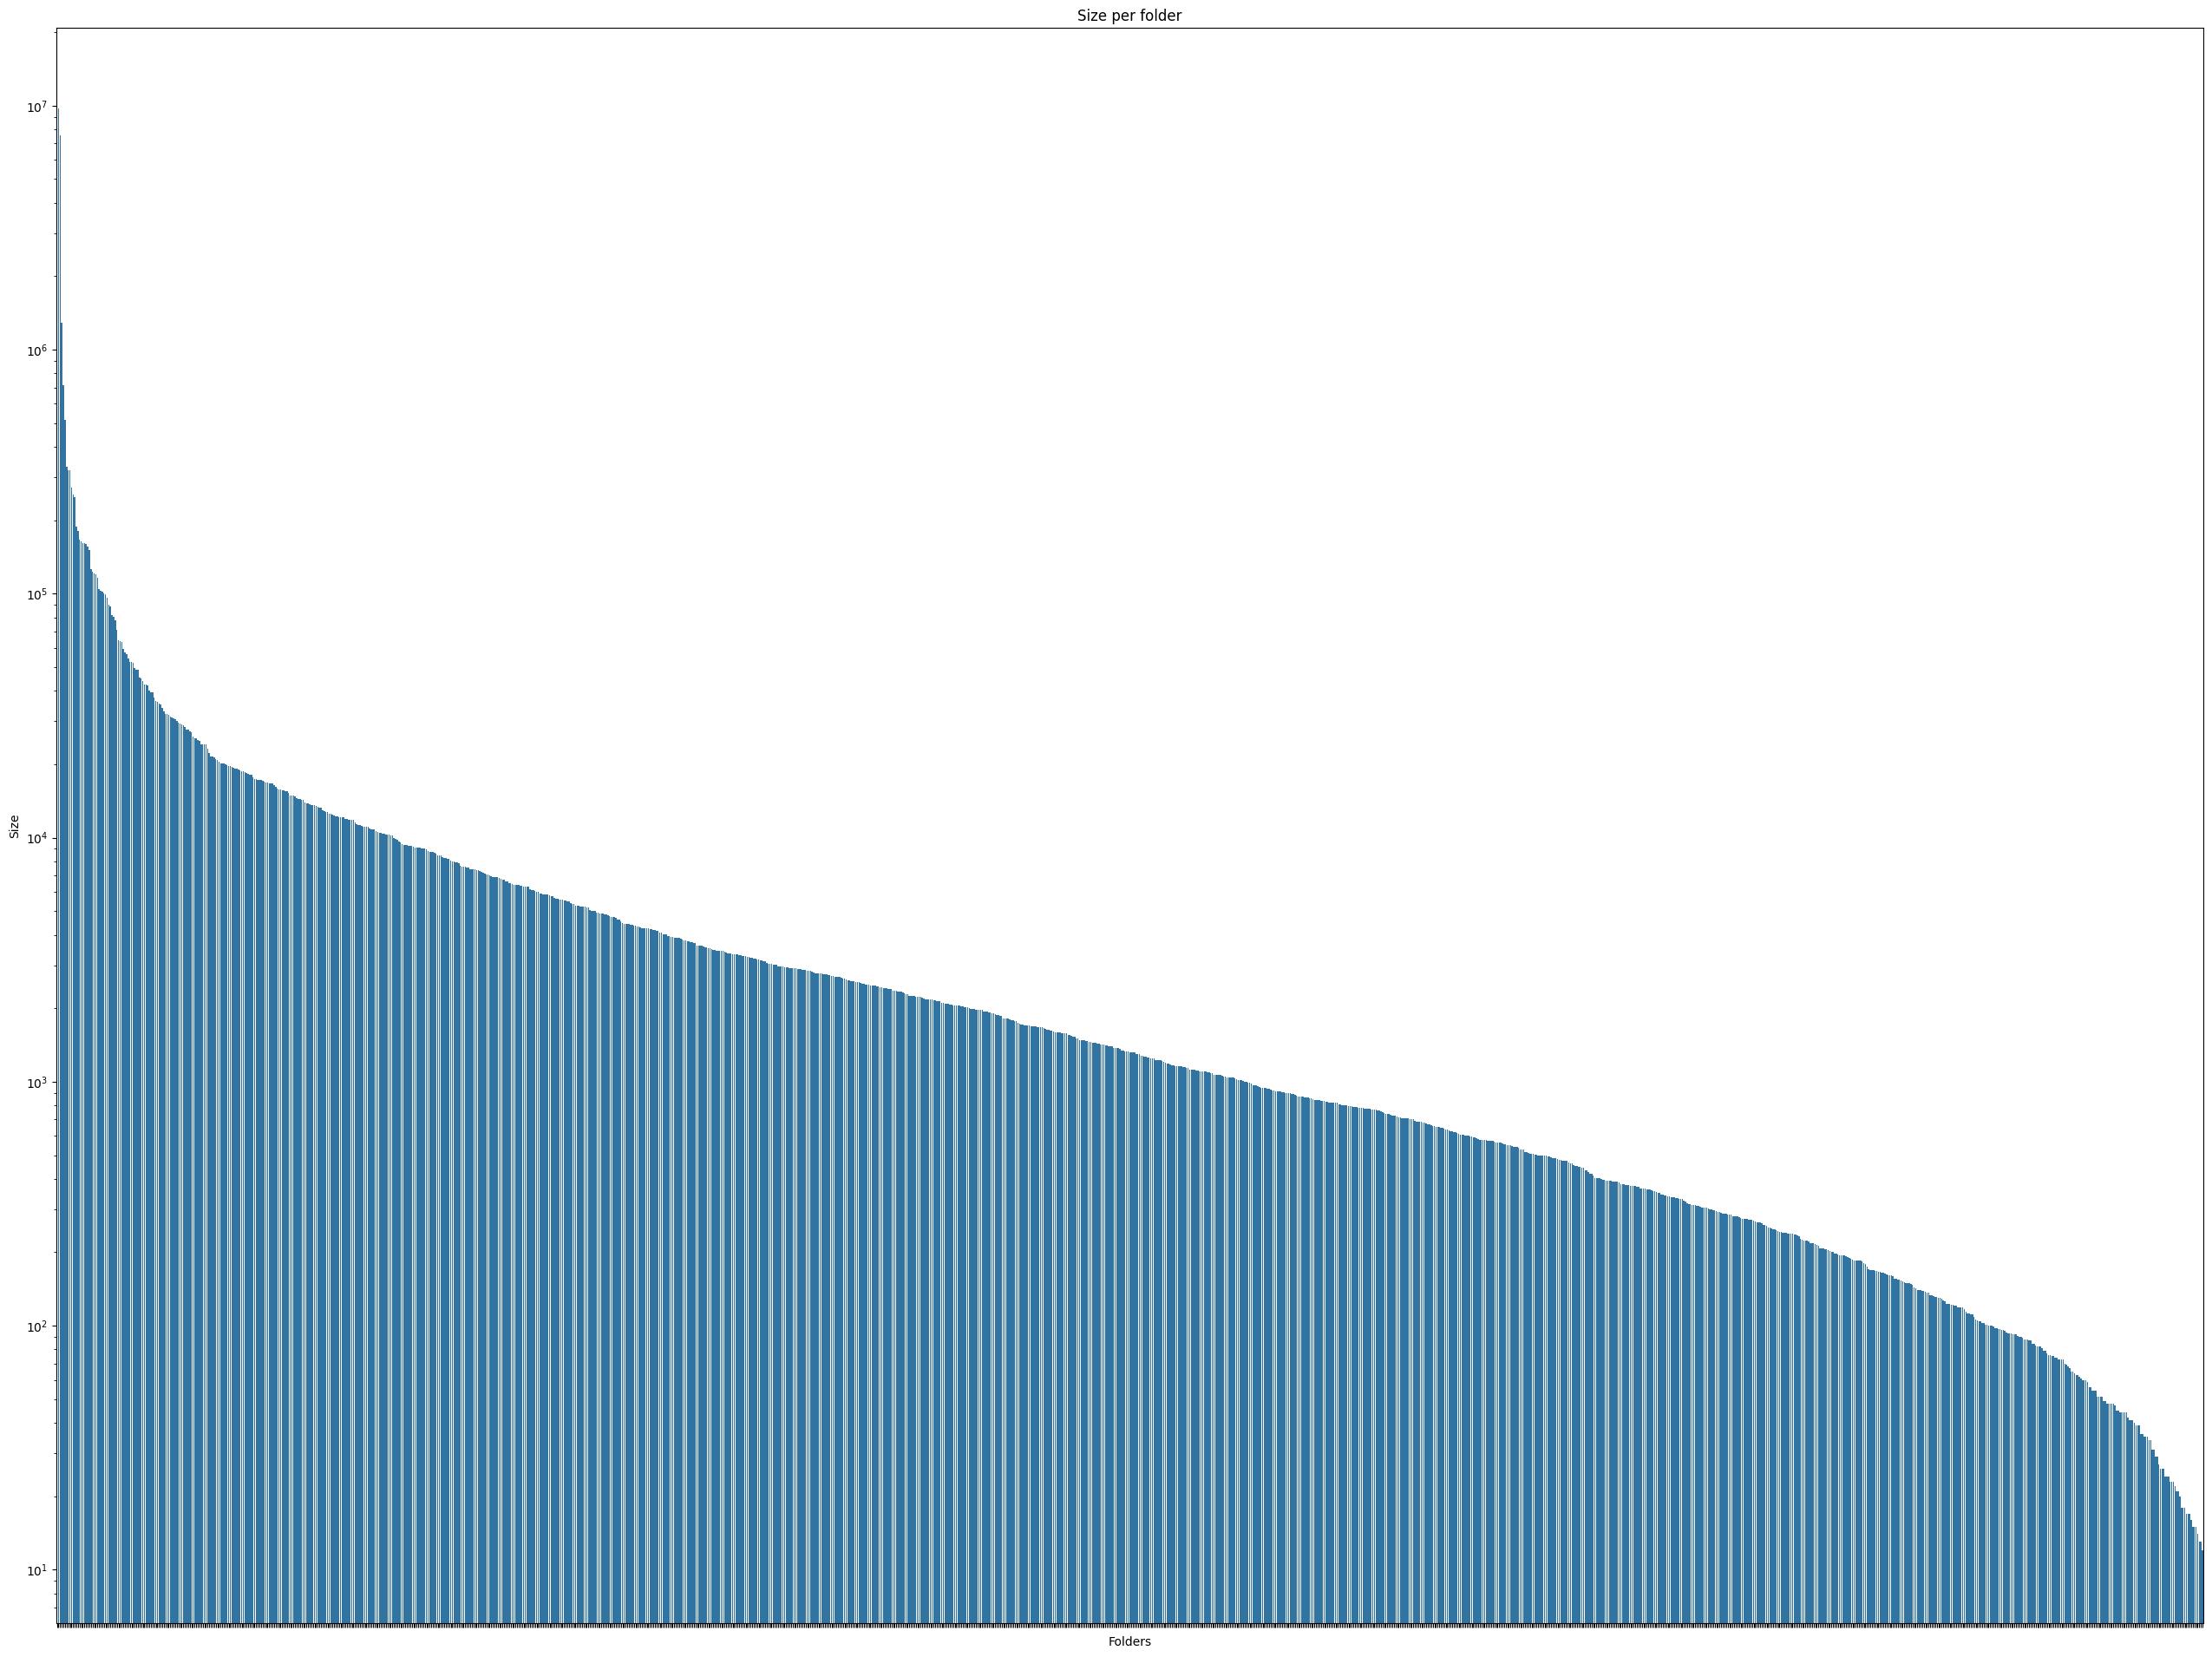

In [30]:
def barplot(data: np.array, names: np.array):
    
    combined_ratio = 4
    labelsize_ratio = 1/8
    
    width_ratio = combined_ratio
    height_ratio = combined_ratio

    plt.figure(figsize=(6.4 * width_ratio, 4.8 * height_ratio))
    ax = sns.barplot(x=names, y=data) 
    ax.set_xticklabels([])
    # sns.barplot(y=data) 

    plt.title('Size per folder')
    
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.rc('xtick', labelsize=10 * labelsize_ratio)

    plt.xlabel('Folders')
    plt.ylabel('Size')


    plt.tight_layout() 
    plt.savefig(f'{SAVE_DIR}folder_size_barplot.png')
    plt.show()
    plt.close()

barplot(folder_size_df['length_word'].to_numpy(), folder_size_df['folder'].to_numpy())

TODO: One big overview without names (hist maybe)
TODO: Make a zoomed in version on the autogenerated ones and the biggest ones

# Distribution user mailbox size




# Similarity subject and body

In [2]:
from sentence_transformers import SentenceTransformer
import os

In [ ]:
model_name = "sentence-transformers/sentence-t5-base"

if not os.path.exists(model_name):
    print(f"{model_name} does not exist. Dowloading and saving now")

    model = SentenceTransformer(model_name)

    model.save(model_name)
else:

    model = SentenceTransformer(model_name)

In [7]:
print(len(df['body'].tolist()))

33864


In [8]:
embeddings = model.encode(df['body'].tolist()[:20])

In [2]:
data = np.load("embeddings.npz")

data.keys()


loaded_mid = data['mid']
loaded_embeddings_subject = data['subject']
loaded_embeddings_body = data['body']

In [3]:
type(loaded_embeddings_body)

numpy.ndarray

In [4]:
ar = [1,2,3,4,5,6]

ar[1:19]

[2, 3, 4, 5, 6]

In [ ]:
# def dot(vecs1: np.ndarray, vecs2: np.ndarray, batches: int = 1000) -> np.ndarray:
    
#     shape_1 = vecs1.shape[0]
#     shape_2 = vecs2.shape[0]
    
#     similarities = []
    
#     if shape_1 != shape_2:
#         raise ValueError(f"Vectors are out of range vecs1={shape_1} vecs2={shape_2}")
    
#     for i in range(0, shape_1, batches):
#         batch_vecs1 = vecs1[i : i + batches]
#         batch_vecs2 = vecs2[i : i + batches]
        
#         batch_similarities = np.dot(batch_vecs1 , batch_vecs2.T)
        
#         similarities += list(batch_similarities)
    
#     return similarities
        

In [6]:
similarities = np.sum(loaded_embeddings_subject * loaded_embeddings_body, axis=1)

## Write similarities back to the database

In [ ]:
df_similarities = pd.DataFrame(data={
    'mid' : loaded_mid,
    'similarities' : similarities
})

In [ ]:
from sqlalchemy import create_engine, text


conn = sqlite3.connect(DB_PATH)

# Write to new table 'similarities'
# if_exists='replace' drops the table if it exists and creates a new one
# if_exists='append' adds to it
df_similarities[['mid', 'similarities']].to_sql(
    name='similarities',
    con=conn,
    if_exists='replace', 
    index=False,
    chunksize=10000  # Write in batches to save memory
)

cursor = conn.cursor()
cursor.execute("CREATE INDEX IF NOT EXISTS idx_sim_mid ON similarities (mid)")
conn.commit()

conn.close()

## Plot similarities

In [6]:
similarities = df['similarities'].to_numpy()

Writing stats for 'similarities' to tbls/similarities_stats.tex...
Successfully wrote tbls/similarities_stats.tex
Writing stats for 'similarities to tbls/similarities_stats.tex...


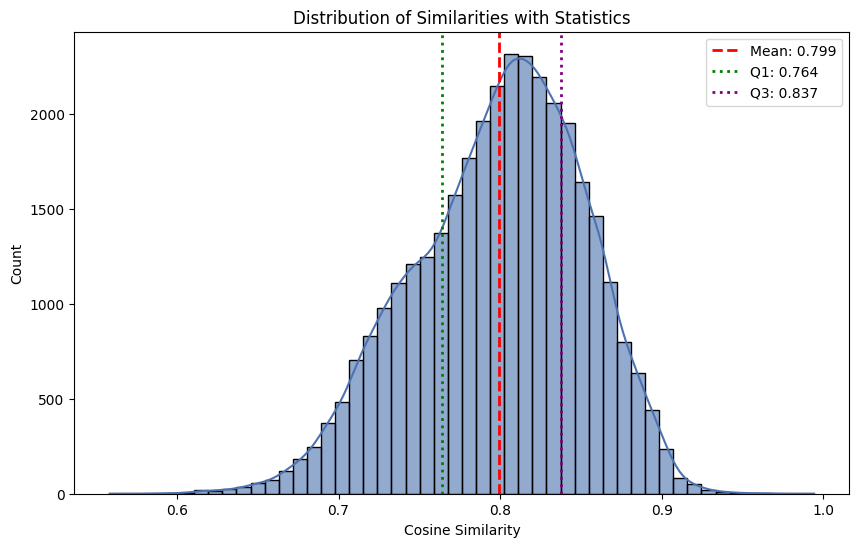

In [10]:
export_stats_to_latex("similarities", similarities)

# Caclulate skewness and kurtosis

mu = np.mean(similarities)
sigma = np.std(similarities)

# Skewness: 3rd Moment / sigma^3
skewness = np.mean(((similarities - mu) / sigma) ** 3)

# Kurtosis (Fisher): 4th Moment / sigma^4 - 3
kurtosis = np.mean(((similarities - mu) / sigma) ** 4) - 3

filepath = os.path.join(SAVE_DIR_TBLS, f"similarities_stats.tex")

# 3. Write LaTeX commands to the file
# We use :.0f for integers (like min/max) and :.2f for floats (like mean)
# The 'r' before the string (rf"...") handles backslashes
with open(filepath, 'a') as f:
    print(f"Writing stats for 'similarities to {filepath}...")
    
    # Helper: Use 2 decimal places if small, otherwise integer
    def fmt(val):
        return f"{val:,.2f}" if abs(val) < 1 else f"{val:,.0f}"

    f.write(rf"\newcommand{{\similaritiesSkewness}}{{{skewness:,.2f}}}" + "\n")
    f.write(rf"\newcommand{{\similaritiesKurtosis}}{{{kurtosis:,.2f}}}" + "\n")

# Assuming 'similarities' is your (N,) array
# Calculate stats
mean_val = np.mean(similarities)
q1_val = np.percentile(similarities, 25)
q3_val = np.percentile(similarities, 75)

plt.figure(figsize=(10, 6))

# 1. Plot Histogram & KDE
sns.histplot(similarities, kde=True, bins=50, color='#4C72B0', alpha=0.6)

# 2. Add Vertical Lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.3f}')
plt.axvline(q1_val, color='green', linestyle=':', linewidth=2, label=f'Q1: {q1_val:.3f}')
plt.axvline(q3_val, color='purple', linestyle=':', linewidth=2, label=f'Q3: {q3_val:.3f}')

plt.title("Distribution of Similarities with Statistics")
plt.xlabel("Cosine Similarity")
plt.legend()
plt.savefig(f'{SAVE_DIR}similarities_hist.png')
plt.show()
plt.close()

In [23]:
df_similarities = pd.DataFrame(data={
    'mid' : loaded_mid,
    'similarities' : similarities
})

In [2]:
conn = sqlite3.connect(DB_PATH)

# Write to new table 'similarities'
# if_exists='replace' drops the table if it exists and creates a new one
# if_exists='append' adds to it
df_similarities[['mid', 'similarities']].to_sql(
    name='similarities',
    con=conn,
    if_exists='replace', 
    index=False,
    chunksize=10000  # Write in batches to save memory
)

cursor = conn.cursor()
cursor.execute("CREATE INDEX IF NOT EXISTS idx_sim_mid ON similarities (mid)")
conn.commit()

conn.close()

NameError: name 'df_similarities' is not defined

# Create files 10K

In [3]:
df.columns

Index(['mid', 'sender', 'eid', 'date', 'message_id', 'subject', 'body',
       'folder', 'length_character', 'length_word', 'body_clean',
       'clean_length_character', 'clean_length_word', 'similarities',
       'strata_key'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

df['strata_key'] = df['sender'].astype(str) + "_" + df['folder'].astype(str)

# 2. Identify keys with at least 2 instances
key_counts = df['strata_key'].value_counts()
valid_keys = key_counts[key_counts >= 2].index

# 3. Filter the dataframe
df_valid = df[df['strata_key'].isin(valid_keys)]

sampled_df, _ = train_test_split(
    df_valid, 
    train_size=10000, 
    stratify=df_valid['strata_key'],
    random_state=42
)

sampled_df = sampled_df.drop(columns=['strata_key'])

In [5]:
sampled_df.shape

(10000, 11)

In [5]:
conn = sqlite3.connect(DB_PATH)

# Write to new table 'similarities'
# if_exists='replace' drops the table if it exists and creates a new one
# if_exists='append' adds to it
sampled_df.to_sql(
    name='N10k',
    con=conn,
    if_exists='replace', 
    index=False,
    chunksize=10000  # Write in batches to save memory
)

cursor = conn.cursor()
cursor.execute("CREATE INDEX IF NOT EXISTS idx_sim_mid ON Message (mid)")
conn.commit()

conn.close()

# Topic analysis on the folder names (weighted on size)